### Develop LSTM Models For Univariate Time Series Forecasting


Univariate time series is the time series that consists of single observations recorded sequentially over equal time increments

There is no output independant/dependant features. Each entry on my dataset depends on previous entries of my dataset

ex: 
1. Sales on each day
2. stock price on each day


In [1]:
#problem statement: consider sales on 9 days, predicts the sales on next 10 days

# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


In [10]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features): #arg: timeseries and stepsize=3 i.e, x= 1st, 2nd, 3rd -> y= 4th
	X, y =[],[] #create X and y list 
    
	for i in range(len(timeseries_data)): #i=0 to 10
		# find the end of this pattern: to find end. initially end= 3, 4th element
		end_ix = i + n_features #end=3
		# check if we are beyond the sequence: now check if end reached 9th pos(last element), if yes then break
		if end_ix > len(timeseries_data)-1:
			break #if end hasnt reached 9th index then do 
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)#x=[0:3] upper bound isnt considered = 110,125, 133
		y.append(seq_y)#y=[3] = 146
	return np.array(X), np.array(y)

In [11]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210] # need not to be in ascending series
# choose a number of time steps
n_steps = 3
# split into samples: preparing dependant and independant variables
X, y = prepare_data(timeseries_data, n_steps)

In [14]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [15]:
X.shape # 3 features by which 6 records are created 
#6 is number of records. 3 is timesteps

(6, 3)

In [16]:
y.shape

(6,)

In [19]:
#before feeding timesteps/input to lstm, we always have to reshape the data int0 3D
# reshape from [samples, timesteps] into [samples, timesteps, features]

n_features1 = 1
X = X.reshape(X.shape[0], X.shape[1], n_features1)

In [20]:
X

array([[[110],
        [125],
        [133]],

       [[125],
        [133],
        [146]],

       [[133],
        [146],
        [158]],

       [[146],
        [158],
        [172]],

       [[158],
        [172],
        [187]],

       [[172],
        [187],
        [196]]])

In [21]:
X.shape

(6, 3, 1)

### Building LSTM Model

In [22]:

# define model
#create sequential layer
model = Sequential()
#Input layer with 50 neurons. Relu AF, ***input shape= stepsize and features which we gave at last to convert into 3 D
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features1)))
#Hidden layer
model.add(LSTM(50, activation='relu'))
#Op lyer with 1 neuron
model.add(Dense(1))
#compiling: calculate loss, reduce model with adam
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)


2022-04-12 06:06:53.728202: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/300
1/1 [==============================] - 3s 3s/step - loss: 32891.7500
Epoch 2/300
1/1 [==============================] - 0s 11ms/step - loss: 32745.0527
Epoch 3/300
1/1 [==============================] - 0s 17ms/step - loss: 32610.0312
Epoch 4/300
1/1 [==============================] - 0s 27ms/step - loss: 32489.4746
Epoch 5/300
1/1 [==============================] - 0s 23ms/step - loss: 32381.2344
Epoch 6/300
1/1 [==============================] - 0s 20ms/step - loss: 32281.2129
Epoch 7/300
1/1 [==============================] - 0s 20ms/step - loss: 32182.0234
Epoch 8/300
1/1 [==============================] - 0s 68ms/step - loss: 32077.0781
Epoch 9/300
1/1 [==============================] - 0s 19ms/step - loss: 31956.5488
Epoch 10/300
1/1 [==============================] - 0s 13ms/step - loss: 31798.1191
Epoch 11/300
1/1 [==============================] - 0s 18ms/step - loss: 31575.7344
Epoch 12/300
1/1 [==============================] - 0s 14ms/step - loss: 31279.9590
Epo

1/1 [==============================] - 0s 24ms/step - loss: 14.2684
Epoch 102/300
1/1 [==============================] - 0s 29ms/step - loss: 13.8010
Epoch 103/300
1/1 [==============================] - 0s 16ms/step - loss: 13.2724
Epoch 104/300
1/1 [==============================] - 0s 18ms/step - loss: 12.6931
Epoch 105/300
1/1 [==============================] - 0s 10ms/step - loss: 12.0481
Epoch 106/300
1/1 [==============================] - 0s 10ms/step - loss: 11.3105
Epoch 107/300
1/1 [==============================] - 0s 16ms/step - loss: 10.5060
Epoch 108/300
1/1 [==============================] - 0s 10ms/step - loss: 9.9488
Epoch 109/300
1/1 [==============================] - 0s 10ms/step - loss: 9.5039
Epoch 110/300
1/1 [==============================] - 0s 15ms/step - loss: 8.6100
Epoch 111/300
1/1 [==============================] - 0s 12ms/step - loss: 8.0410
Epoch 112/300
1/1 [==============================] - 0s 12ms/step - loss: 7.5937
Epoch 113/300
1/1 [================

1/1 [==============================] - 0s 11ms/step - loss: 2.3309
Epoch 203/300
1/1 [==============================] - 0s 12ms/step - loss: 2.3089
Epoch 204/300
1/1 [==============================] - 0s 11ms/step - loss: 2.3475
Epoch 205/300
1/1 [==============================] - 0s 10ms/step - loss: 2.3746
Epoch 206/300
1/1 [==============================] - 0s 9ms/step - loss: 2.2936
Epoch 207/300
1/1 [==============================] - 0s 10ms/step - loss: 2.3306
Epoch 208/300
1/1 [==============================] - 0s 9ms/step - loss: 2.3218
Epoch 209/300
1/1 [==============================] - 0s 8ms/step - loss: 2.3069
Epoch 210/300
1/1 [==============================] - 0s 9ms/step - loss: 2.2805
Epoch 211/300
1/1 [==============================] - 0s 9ms/step - loss: 2.2763
Epoch 212/300
1/1 [==============================] - 0s 10ms/step - loss: 2.2923
Epoch 213/300
1/1 [==============================] - 0s 9ms/step - loss: 2.2725
Epoch 214/300
1/1 [=============================

### Predicting For the next 10 data

In [25]:
from array import array

In [28]:
# demonstrate prediction for next 10 days

#take data from previous 3 days data 
x_input = np.array([187, 196, 210])
#this 3 days data is stored in temp
temp_input=list(x_input)
#create new list called op
lst_output=[]
i=0

#until i<10 do 

while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[222.39233]
1 day input [196.         210.         222.39233398]
1 day output [[233.6269]]
2 day input [210.         222.39233398 233.62690735]
2 day output [[247.79518]]
3 day input [222.39233 233.6269  247.79518]
3 day output [[261.32437]]
4 day input [233.6269  247.79518 261.32437]
4 day output [[275.13245]]
5 day input [247.79518 261.32437 275.13245]
5 day output [[290.91498]]
6 day input [261.32437 275.13245 290.91498]
6 day output [[306.79245]]
7 day input [275.13245 290.91498 306.79245]
7 day output [[323.62488]]
8 day input [290.91498 306.79245 323.62488]
8 day output [[342.07324]]
9 day input [306.79245 323.62488 342.07324]
9 day output [[361.20755]]
[222.39233, 233.6269, 247.79518, 261.32437, 275.13245, 290.91498, 306.79245, 323.62488, 342.07324, 361.20755]


In [29]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [30]:
len(timeseries_data)

9

In [31]:
lst_output

[222.39233,
 233.6269,
 247.79518,
 261.32437,
 275.13245,
 290.91498,
 306.79245,
 323.62488,
 342.07324,
 361.20755]

In [75]:
lst

[170, 180, 190]

### Visualizaing The Output

In [32]:
import matplotlib.pyplot as plt

In [33]:
day_new=np.arange(1,10) # I have data from 1st till 9th day
day_pred=np.arange(10,20)#predicted data from 10th till 20th

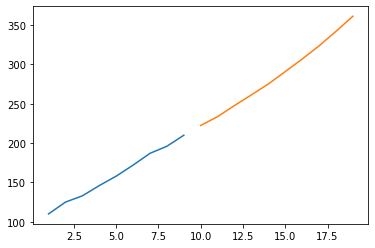

In [34]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)
